<a href="https://colab.research.google.com/github/HiteshAI/CartoonGan-tensorflow/blob/master/CartoonGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/mnicnc404/CartoonGan-tensorflow.git

In [0]:
%cd /content/CartoonGan-tensorflow/

In [0]:
!git clone https://www.github.com/keras-team/keras-contrib.git \
    && cd keras-contrib \
    && python convert_to_tf_keras.py \
    && USE_TF_KERAS=1 python setup.py install

In [0]:

!pip install tensorflow-gpu==2.0.0a0
!pip install tqdm
!pip install imageio
!pip install tb-nightly==1.14.0a20190505


# !pip install -r requirements_cpu.txt

# !pip install tensorflow-gpu==2.0.0

In [0]:
import tensorflow as tf
tf.__version__

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
# If you have downloaded my dataset, then keep dataset_name as it is. If you have uploaded your own dataset to gdrive then write its name in dataset_name.
dataset_name = 'new_dataset_cartoon_meena_cleaned_again.zip'
!cp /content/drive/My\ Drive/{dataset_name} /content/CartoonGan-tensorflow/
!unzip /content/CartoonGan-tensorflow/{dataset_name} 


# **Data Preprocessing**
This is one of the critical steps before feeding your data to your AI model. We need to ensure that images are not broken, or aspects in your input data which is worth exploring in details. It helps to understand the problem.

In [14]:
import numpy as np
dir = '/content/CartoonGan-tensorflow/datasets/meena_cartoon/trainB'
import os
from os import walk
from PIL import Image

def get_img_absolute_path(imgs_path):
  list = []
  for dirpath, dirnames, filenames in walk(imgs_path):
    for f in filenames:
      abs_filepath = dirpath + '/' + f  
      list.append(abs_filepath)
  return list


neutral = []

def remove_corrupt_data(fullpath_image_list):
  filter = fullpath_image_list
  for i in range(len(fullpath_image_list)):
      i += 1
      
      # img = Image.open(f'{i}b.jpg').convert('L')
      for r in fullpath_image_list:
        img_name = os.path.basename(r)
        os.chdir(dir)
        img = Image.open(img_name)
        if not img:
          print(fullpath_image_list.index(img_name))
          filter.pop(result.index(img_name))
          continue
      return filter  

def img_to_numpy_array(img, size):
  img = Image.open(img).convert('L')
  img = img.resize((size,size), Image.ANTIALIAS)
  img2 = np.array(img).flatten() # vectorization
  return img2    

fullpath_image_list = get_img_absolute_path(dir)
clean_data = remove_corrupt_data(fullpath_image_list)

neutral = []
for data in clean_data:
  img2 = img_to_numpy_array(data, 128)
  neutral.append(img2)
  
X = np.vstack(neutral)
        

# print(neutral)
# X = np.asarray(neutral)
y = np.ones((len(X),1))
print("X ndim: ", X.ndim)
print("X shape:", X.shape)
print("X size: ", X.size)

print("y ndim: ", y.ndim)
print("y shape:", y.shape)
print("y size: ", y.size)


X ndim:  2
X shape: (843, 16384)
X size:  13811712
y ndim:  2
y shape: (843, 1)
y size:  843


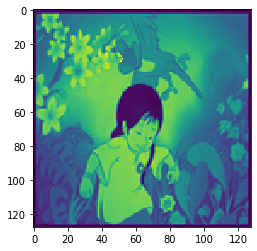

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import random

def visualize_sample(X):
    plt.imshow(X.reshape(128,128), interpolation='nearest')
    # plt.imshow(X, interpolation='nearest')


i = random.randint(0,X.shape[0]-1 )
visualize_sample(X[i])

In [23]:
import os
(os.chdir('/content/CartoonGan-tensorflow'))
# !python /content/CartoonGan-tensorflow/scripts/smooth.py --path /content/CartoonGan-tensorflow/datasets/meena_cartoon


  0% 3/843 [00:03<15:42,  1.12s/it]
Traceback (most recent call last):
  File "/content/CartoonGan-tensorflow/scripts/smooth.py", line 57, in <module>
    main(args.path)
  File "/content/CartoonGan-tensorflow/scripts/smooth.py", line 49, in main
    make_edge_smooth(path)
  File "/content/CartoonGan-tensorflow/scripts/smooth.py", line 37, in make_edge_smooth
    gauss))
KeyboardInterrupt


In [0]:

# !python train.py \
#     --batch_size 4 \
#     --pretrain_epochs 1 \
#     --content_lambda .4 \
#     --pretrain_learning_rate 2e-4 \
#     --g_adv_lambda 8. \
#     --generator_lr 8e-5 \
#     --discriminator_lr 3e-5 \
#     --style_lambda 25. \
#     --light \
#     --dataset_name {meena-cartoon}
# os.path.join()
(os.chdir('/content/CartoonGan-tensorflow'))
!python train.py \
    --batch_size 8 \
    --pretrain_epochs 1 \
    --content_lambda .4 \
    --pretrain_learning_rate 1e-4 \
    --g_adv_lambda 8. \
    --generator_lr 4e-5 \
    --discriminator_lr 1.5e-5 \
    --style_lambda 25. \
    --light \
    --dataset_name meena_cartoon \
    --disable_sampling \
    --sample_size 50


#Full training
# !python train.py \
#     --batch_size 8 \
#     --pretrain_epochs 1 \
#     --content_lambda .4 \
#     --pretrain_learning_rate 2e-4 \
#     --g_adv_lambda 8. \
#     --generator_lr 8e-5 \
#     --discriminator_lr 3e-5 \
#     --style_lambda 25. \
#     --light \
#     --dataset_name meena_cartoon    


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [0]:
%reload_ext tensorboard
%load_ext tensorboard
%tensorboard --logdir runs

# **Export your model**

In [0]:
!mkdir /content/CartoonGan-tensorflow/exported_models/light_meena_SavedModel 
out_dir = '/content/CartoonGan-tensorflow/exported_models/light_meena_SavedModel'
m_path = '/content/CartoonGan-tensorflow/training_checkpoints'

!python export.py \
    --m_path m_path \
    --out_dir out_dir \
    --light

In [0]:
!zip -r /content/new_dataset_cartoon_meena_cleaned.zip /content/CartoonGan-tensorflow/datasets

In [0]:
import os
os.chdir()
from google.colab import files